In [1]:
import sys
import torch
from tqdm import tqdm

sys.path.append('../src')
from util import get_particles, grab_plot, show_particles, transport_loss, VideoWriter

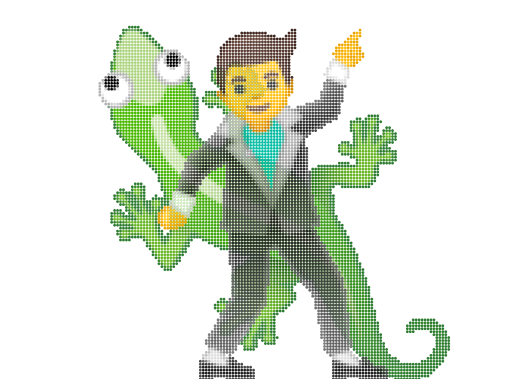

In [2]:
SEED_PATH = '../images/lizard.png'
TARGET_PATH = '../images/dancer.png'

seed = get_particles(SEED_PATH, n_channels=16, threshold=1.)
target = get_particles(TARGET_PATH, threshold=.5)
show_particles(seed, target)

In [3]:
x, y = seed.clone().requires_grad_(), target.clone()
optimizer = torch.optim.SGD([x], 1.)

with VideoWriter(path='../videos/demo_autoplay.mp4') as video:
    for i in tqdm(range(500)):
        show_particles(x.detach(), show=False)
        video.write(grab_plot())
        loss = transport_loss(x[:, :5], y, scale=i/100)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

100%|██████████| 500/500 [00:29<00:00, 16.69it/s]
